<a href="https://colab.research.google.com/github/atikahlestar/Data-Analysis/blob/main/Kasus_4_Analyst_Fasilitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kasus 04 : Restoran Cepat Saji Roica
Restoran Cepat Saji Roica adalah sebuah jaringan restoran cepat saji yang tersebar di berbagai wilayah Indonesia. Restoran ini memiliki sejumlah cabang dengan beberapa di antaranya menyediakan fasilitas drive-thru untuk memudahkan pelanggan membeli makanan tanpa perlu keluar dari kendaraan. Selain itu, cabang-cabang tersebut terletak di berbagai lokasi seperti perkotaan (Urban), pinggiran kota (Suburban), dan pedesaan (Rural). Tim manajemen Roica sedang berfokus pada peningkatan efisiensi operasional dan penentuan strategi untuk membuka cabang baru dengan mempertimbangkan berbagai aspek seperti fasilitas drive-thru, lokasi, jumlah karyawan, area parkir, dan jam operasional.

Untuk membantu manajemen dalam mengambil keputusan strategis, tim data analyst Restoran Roica melakukan analisis terhadap data transaksi dari berbagai cabang. Beberapa pertanyaan kunci muncul terkait dengan kinerja cabang-cabang tersebut, terutama seputar perbedaan jumlah transaksi, pendapatan, serta faktor-faktor yang memengaruhi performa cabang.

Tim manajemen ingin menjawab beberapa pertanyaan spesifik yang akan membantu mereka membuat keputusan berbasis data, seperti:
1. Apakah terdapat perbedaan signifikan antara rata-rata jumlah transaksi cabang yang memiliki fasilitas drive-thru dan yang tidak? Jika ya, berapa persentase perbedaannya?
2. Apakah terdapat perbedaan rata-rata jumlah transaksi berdasarkan lokasi cabang (Urban, Suburban, dan Rural)? Jika ya, lokasi mana yang memiliki rata-rata transaksi tertinggi?
3. Apakah cabang dengan fasilitas drive-thru memiliki rata-rata pendapatan yang lebih tinggi dibandingkan cabang non drive-thru? Jika ya, berapa selisih rata-ratanya?
4. Apakah terdapat korelasi yang signifikan antara jumlah karyawan dan jumlah transaksi?
5. Bagaimana hubungan antara ukuran area parkir dan jumlah transaksi di cabang?
6. Bagaimana pengaruh jam operasional per hari terhadap jumlah transaksi di cabang?

Untuk menjawab pertanyaan-pertanyaan tersebut, tim data analyst Roica memulai dengan mengumpulkan data transaksi cabang, yang mencakup informasi seperti jumlah transaksi, fasilitas drive-thru, lokasi, jumlah karyawan, jam operasional, dan pendapatan setiap cabang.

## Dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
file_path = "https://docs.google.com/spreadsheets/d/1GK4SjHcCSO2QHkywu_0N83jHMPlTVYbU/export?format=csv"

In [37]:
df = pd.read_csv(file_path)
df.head()

,Cabang,Drive-Thru,Jumlah Transaksi,Lokasi,Hari Kerja per Minggu,Jam Operasional per Hari,Jumlah Karyawan,Area Parkir (m²),Pendapatan (Rp)
0,A,Ya,2380,Urban,6,12,15,500,Rp 120.000.000
1,B,Tidak,2000,Suburban,6,10,12,300,Rp 100.000.000
2,C,Ya,2500,Urban,7,14,18,600,Rp 130.000.000
3,D,Tidak,2100,Rural,5,8,10,200,Rp 105.000.000
4,E,Ya,2700,Suburban,7,13,17,550,Rp 140.000.000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Cabang                    26 non-null     object
 1   Drive-Thru                26 non-null     object
 2   Jumlah Transaksi          26 non-null     int64 
 3   Lokasi                    26 non-null     object
 4   Hari Kerja per Minggu     26 non-null     int64 
 5   Jam Operasional per Hari  26 non-null     int64 
 6   Jumlah Karyawan           26 non-null     int64 
 7   Area Parkir (m²)          26 non-null     int64 
 8   Pendapatan (Rp)           26 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.0+ KB


In [39]:
df.duplicated().sum()

0

In [40]:
df.isnull().sum()

,0
Cabang,0
Drive-Thru,0
Jumlah Transaksi,0
Lokasi,0
Hari Kerja per Minggu,0
Jam Operasional per Hari,0
Jumlah Karyawan,0
Area Parkir (m²),0
Pendapatan (Rp),0


## Soal 1
Apakah terdapat perbedaan signifikan antara rata-rata jumlah transaksi cabang yang memiliki fasilitas drive-thru dan yang tidak? Jika ya, berapa persentase perbedaannya?


### Jawab :

In [41]:
## Rata-rata jumlah transaksi
avg_transaction = df.groupby("Drive-Thru")["Jumlah Transaksi"].mean()
avg_transaction

,Jumlah Transaksi
Drive-Thru,
Tidak,2203.846154
Ya,2729.230769


<ipython-input-42-7ff69022cae5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette="viridis")


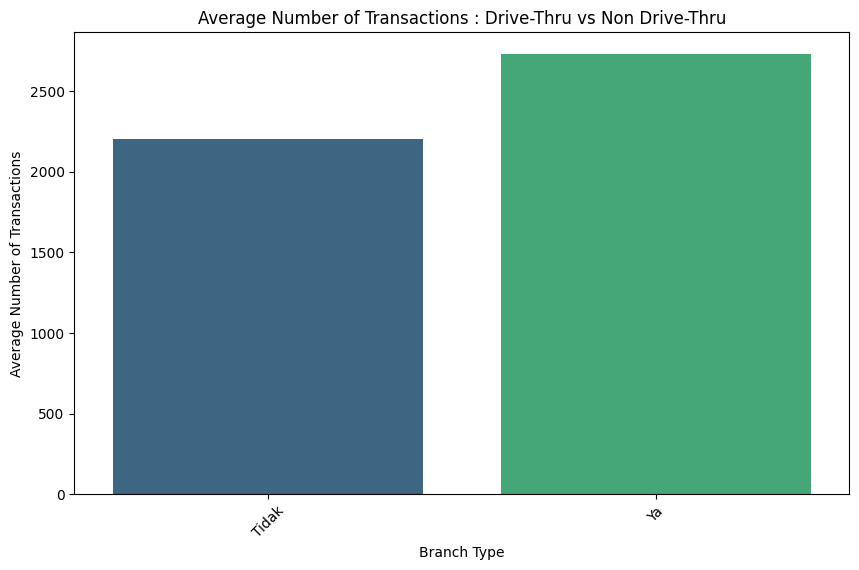

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette="viridis")
plt.title("Average Number of Transactions : Drive-Thru vs Non Drive-Thru")
plt.xlabel("Branch Type")
plt.ylabel("Average Number of Transactions")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Transaksi Lebih Tinggi di Cabang dengan Drive-Thru: Cabang dengan drive-thru memiliki rata-rata jumlah transaksi yang lebih tinggi dibandingkan dengan cabang tanpa drive-thru. Ini menunjukkan bahwa drive-thru merupakan fasilitas yang penting dan dapat meningkatkan jumlah transaksi secara signifikan.
2. Perbedaan Signifikan: Dengan perbedaan sekitar 23.84%, cabang dengan drive-thru memiliki potensi untuk menarik lebih banyak pelanggan, mungkin karena kemudahan akses tanpa harus keluar dari kendaraan, yang sangat penting terutama di area dengan mobilitas tinggi atau ketika pelanggan mencari kenyamanan.
3. Strategi Ekspansi: Untuk strategi pembukaan cabang baru, data ini menunjukkan bahwa menambahkan fasilitas drive-thru dapat menjadi faktor yang meningkatkan performa cabang di masa depan. Cabang-cabang yang berada di wilayah perkotaan atau pinggiran dengan mobilitas tinggi mungkin mendapatkan manfaat lebih besar dari drive-thru.

Secara keseluruhan, fasilitas drive-thru terbukti menjadi salah satu faktor penting dalam mendorong peningkatan transaksi di Restoran Roica.



## Soal 2

Apakah terdapat perbedaan rata-rata jumlah transaksi berdasarkan lokasi cabang (Urban, Suburban, dan Rural)? Jika ya, lokasi mana yang memiliki rata-rata transaksi tertinggi?


### Jawab :

In [43]:
# Rata-rata jumlah transaksi berdasarkan lokasi
avg_transaction_location = df.groupby("Lokasi")["Jumlah Transaksi"].mean()
avg_transaction_location


,Jumlah Transaksi
Lokasi,
Rural,2506.25
Suburban,2400.00
Urban,2488.00


<ipython-input-44-c734cba46444>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_location.index, y=avg_transaction_location.values, palette="viridis")


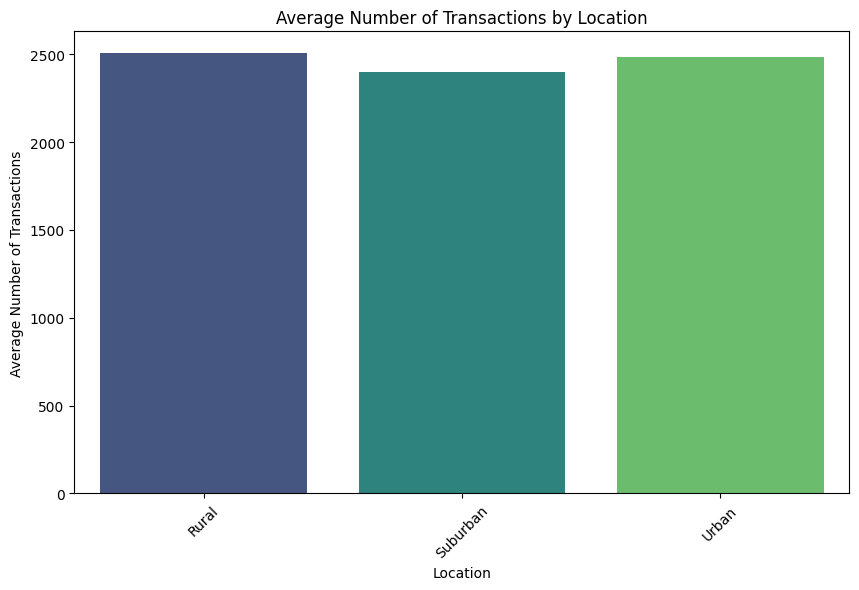

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_location.index, y=avg_transaction_location.values, palette="viridis")
plt.title("Average Number of Transactions by Location")
plt.xlabel("Location")
plt.ylabel("Average Number of Transactions")
plt.xticks(rotation=45)
plt.show()

### Analisis :

1. Cabang di Wilayah Rural Memiliki Rata-rata Transaksi Tertinggi:
  - Dengan rata-rata jumlah transaksi sebesar 2,506, cabang di wilayah pedesaan (Rural) menunjukkan performa yang paling tinggi. Hal ini mungkin disebabkan oleh beberapa faktor, seperti kurangnya persaingan dengan restoran lain di wilayah tersebut, atau kebiasaan penduduk yang lebih bergantung pada restoran cepat saji karena keterbatasan pilihan makan di luar.
2. Cabang Urban dan Suburban:
  - Cabang di daerah Urban dan Suburban memiliki rata-rata transaksi yang relatif lebih rendah dibandingkan Rural. Meski begitu, Urban masih menunjukkan kinerja yang mendekati Rural dengan rata-rata 2,488 transaksi, yang menunjukkan bahwa urbanisasi, mobilitas tinggi, dan konsentrasi penduduk berkontribusi terhadap volume transaksi yang signifikan.
  - Cabang di wilayah Suburban memiliki rata-rata transaksi terendah, yaitu 2,400 transaksi. Ini mungkin disebabkan oleh karakteristik wilayah suburban yang lebih tersebar, di mana pelanggan mungkin lebih memilih memasak sendiri atau ada lebih banyak pilihan restoran, sehingga mengurangi ketergantungan pada restoran cepat saji.
3. Implikasi untuk Strategi Pembukaan Cabang Baru:
  - Hasil ini memberikan insight penting bagi tim manajemen dalam merencanakan ekspansi cabang. Meski Urban umumnya dianggap sebagai wilayah yang potensial karena konsentrasi penduduknya, cabang di wilayah Rural menunjukkan bahwa pasar pedesaan juga bisa menjadi peluang besar dengan permintaan yang tinggi.
  - Sebaliknya, untuk wilayah Suburban, strategi promosi atau pengembangan produk khusus mungkin diperlukan untuk meningkatkan performa cabang di sana.
  
Secara keseluruhan, lokasi cabang memainkan peran penting dalam jumlah transaksi yang dihasilkan. Pemasaran yang disesuaikan dengan karakteristik masing-masing wilayah dapat membantu meningkatkan performa cabang lebih lanjut.


## Soal 3

Apakah cabang dengan fasilitas drive-thru memiliki rata-rata pendapatan yang lebih tinggi dibandingkan cabang non drive-thru? Jika ya, berapa selisih rata-ratanya?



### Jawab :

In [45]:
# Rata-rata jumlah transaksi berdasarkan pendapatan
# Convert 'Pendapatan (Rp)' to numeric, removing non-digit characters
# Check if the column is already numeric, if not, convert it to string first
if not pd.api.types.is_numeric_dtype(df['Pendapatan (Rp)']):
    df['Pendapatan (Rp)'] = df['Pendapatan (Rp)'].astype(str).str.replace(r'\D+', '', regex=True).astype(float)
else:
    # If it's already numeric, no need for string conversion
    df['Pendapatan (Rp)'] = df['Pendapatan (Rp)'].astype(float)

# Rata-rata jumlah transaksi berdasarkan pendapatan
avg_transaction_income = df.groupby("Drive-Thru")["Pendapatan (Rp)"].mean()
avg_transaction_income

,Pendapatan (Rp)
Drive-Thru,
Tidak,1.106154e+08
Ya,1.400000e+08


<ipython-input-46-a0220a7eff24>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_income.index, y=avg_transaction_income.values, palette="viridis")


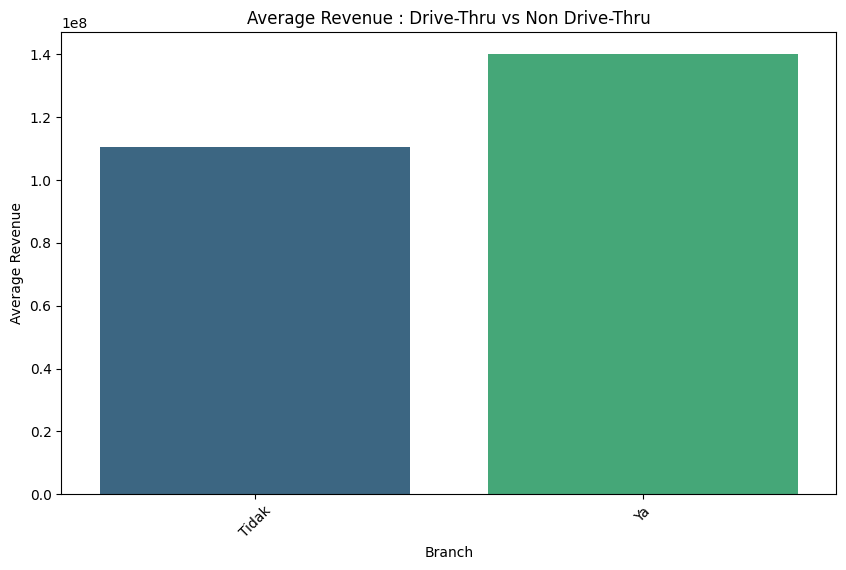

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_transaction_income.index, y=avg_transaction_income.values, palette="viridis")
plt.title("Average Revenue : Drive-Thru vs Non Drive-Thru")
plt.xlabel("Branch")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)
plt.show()


### Analisis :

1. Cabang dengan Drive-Thru Memiliki Pendapatan Lebih Tinggi:
  - Cabang yang memiliki fasilitas drive-thru mencatat pendapatan rata-rata sebesar Rp 140.000.000, sedangkan cabang tanpa drive-thru mencatat pendapatan rata-rata Rp 110.615.385. Ini menunjukkan bahwa drive-thru secara signifikan berkontribusi pada peningkatan pendapatan cabang.
2. Selisih yang Signifikan:
  - Selisih rata-rata pendapatan sebesar Rp 29.384.615 menunjukkan bahwa drive-thru bukan hanya menarik lebih banyak transaksi, tetapi juga menghasilkan pendapatan yang lebih besar. Fasilitas ini kemungkinan mempermudah pelanggan dalam melakukan pembelian, terutama bagi mereka yang mencari kenyamanan atau memiliki keterbatasan waktu.
3. Faktor yang Mungkin Mempengaruhi:
  - Fasilitas drive-thru bisa jadi menarik lebih banyak pelanggan yang melakukan pembelian lebih besar atau lebih sering. Pelanggan yang menggunakan drive-thru cenderung lebih cepat dalam memutuskan pembelian karena sifatnya yang praktis.
  - Selain itu, cabang dengan drive-thru mungkin lebih berlokasi di area dengan lalu lintas tinggi, seperti di perkotaan atau jalan utama, yang berpotensi menambah jumlah pelanggan.
4. Strategi Pengembangan Bisnis:
  - Dengan hasil ini, manajemen Restoran Roica dapat mempertimbangkan untuk lebih fokus membuka cabang baru dengan fasilitas drive-thru, terutama di wilayah yang strategis. Fasilitas drive-thru telah terbukti tidak hanya meningkatkan jumlah transaksi, tetapi juga pendapatan.
  - Mengintegrasikan lebih banyak cabang dengan drive-thru di lokasi-lokasi yang memiliki mobilitas tinggi atau yang lebih membutuhkan kenyamanan akan sangat bermanfaat untuk meningkatkan performa keuangan cabang.
  
Secara keseluruhan, hasil ini memberikan insight bahwa fasilitas drive-thru merupakan faktor kunci yang mendukung peningkatan pendapatan. Tim manajemen dapat mempertimbangkan untuk menambahkan fasilitas ini dalam rencana ekspansi mereka untuk meningkatkan profitabilitas di masa depan.


## Soal 4

Apakah terdapat korelasi yang signifikan antara jumlah karyawan dan jumlah transaksi?


### Jawab :

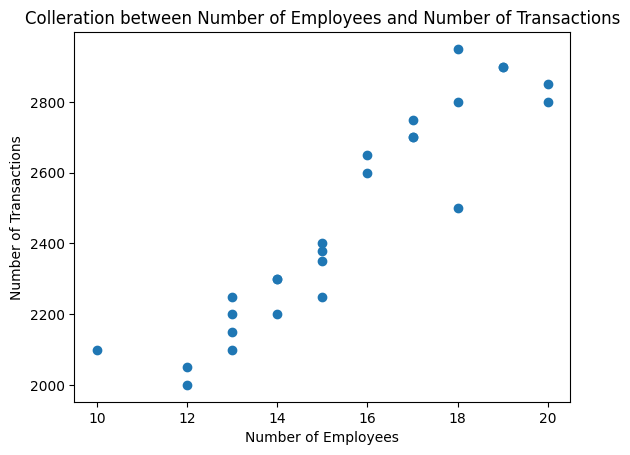

In [47]:
plt.scatter(df["Jumlah Karyawan"], df["Jumlah Transaksi"])
plt.title("Colleration between Number of Employees and Number of Transactions")
plt.xlabel("Number of Employees")
plt.ylabel("Number of Transactions")
plt.show()

### Analisis :

1. Korelasi Kuat dan Positif:
  - Nilai korelasi sebesar 0,93 menunjukkan adanya hubungan yang sangat kuat antara jumlah karyawan dan jumlah transaksi. Artinya, semakin banyak karyawan yang dimiliki sebuah cabang, semakin tinggi pula jumlah transaksi yang dapat dilayani oleh cabang tersebut.
2. Indikasi Produktivitas:
  - Jumlah karyawan yang lebih banyak dapat mencerminkan kemampuan cabang dalam menangani lebih banyak pelanggan, yang pada akhirnya meningkatkan jumlah transaksi. Cabang dengan tenaga kerja yang lebih besar mampu melayani lebih banyak pelanggan secara efisien, terutama selama jam sibuk atau di cabang dengan volume pelanggan yang tinggi.
3. Optimalisasi Sumber Daya:
  - Temuan ini memberikan panduan bagi manajemen untuk memastikan bahwa cabang memiliki jumlah karyawan yang sesuai dengan volume transaksi. Jika jumlah karyawan tidak memadai, hal ini dapat menyebabkan penurunan efisiensi operasional, waktu tunggu yang lebih lama bagi pelanggan, dan pada akhirnya dapat menurunkan jumlah transaksi.
4. Strategi Pengaturan Karyawan:
  - Manajemen dapat menggunakan hasil ini untuk menentukan kebutuhan karyawan berdasarkan estimasi transaksi di cabang-cabang yang berbeda. Dengan menyesuaikan jumlah karyawan dengan volume transaksi yang diantisipasi, mereka dapat meningkatkan efisiensi dan kinerja setiap cabang.
  
Secara keseluruhan, hubungan antara jumlah karyawan dan jumlah transaksi sangat kuat, dan hasil ini mengindikasikan bahwa manajemen harus mempertimbangkan jumlah tenaga kerja yang cukup sebagai faktor penting dalam mengoptimalkan performa cabang-cabang Restoran Roica.


## Soal 5

Bagaimana hubungan antara ukuran area parkir dan jumlah transaksi di cabang?


### Jawab :

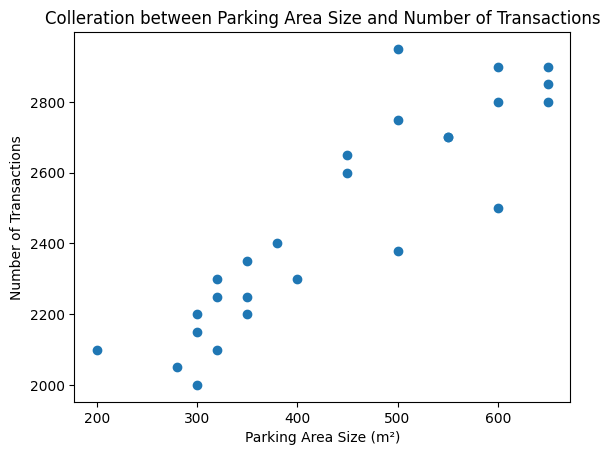

In [48]:
plt.scatter(df["Area Parkir (m²)"], df["Jumlah Transaksi"])
plt.title("Colleration between Parking Area Size and Number of Transactions")
plt.xlabel("Parking Area Size (m²)")
plt.ylabel("Number of Transactions")
plt.show()

### Analisis :

1. Korelasi Positif yang Kuat:
  - Nilai korelasi sebesar 0,90 menunjukkan adanya hubungan yang kuat antara ukuran area parkir dan jumlah transaksi. Semakin besar ukuran area parkir, semakin tinggi jumlah transaksi yang terjadi di cabang tersebut.
2. Kemudahan Akses Bagi Pelanggan:
  - Ukuran area parkir yang lebih besar mungkin memberikan kemudahan akses bagi pelanggan, terutama di wilayah dengan mobilitas tinggi atau bagi pelanggan yang menggunakan kendaraan pribadi. Parkir yang lebih luas juga memungkinkan lebih banyak pelanggan untuk parkir dan berbelanja secara bersamaan, yang berpotensi meningkatkan jumlah transaksi.
3. Faktor Kenyamanan Pelanggan:
  - Area parkir yang luas dapat meningkatkan kenyamanan pelanggan saat berkunjung, terutama pada jam-jam sibuk. Jika parkir terbatas, pelanggan mungkin cenderung enggan mengunjungi cabang karena kesulitan menemukan tempat parkir, sehingga berpotensi menurunkan jumlah transaksi.
4. Strategi Pengembangan Fasilitas:
  - Temuan ini memberikan insight bahwa ukuran area parkir merupakan elemen penting yang dapat mempengaruhi performa cabang. Untuk cabang di wilayah dengan mobilitas tinggi atau lokasi yang sering ramai, memperluas area parkir dapat menjadi strategi untuk meningkatkan transaksi dan kenyamanan pelanggan.

Secara keseluruhan, hubungan yang kuat antara ukuran area parkir dan jumlah transaksi menunjukkan bahwa fasilitas parkir yang memadai sangat berpengaruh dalam menarik lebih banyak pelanggan dan meningkatkan kinerja cabang Restoran Roica.


## Soal 6

Bagaimana pengaruh jam operasional per hari terhadap jumlah transaksi di cabang?


### Jawab :

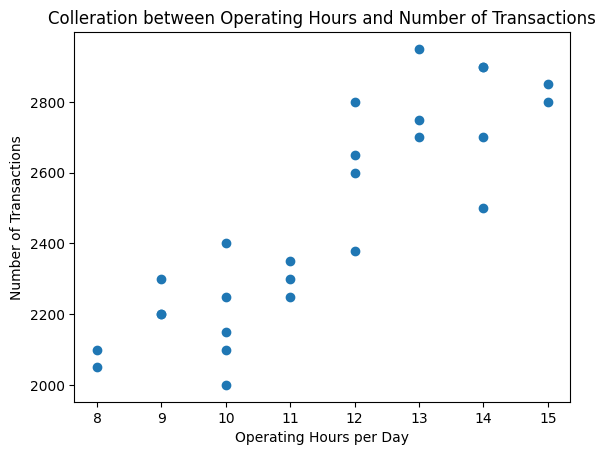

In [49]:
plt.scatter(df["Jam Operasional per Hari"], df["Jumlah Transaksi"])
plt.title("Colleration between Operating Hours and Number of Transactions")
plt.xlabel("Operating Hours per Day")
plt.ylabel("Number of Transactions")
plt.show()

### Analisis :

1. Korelasi Positif yang Kuat:
  - Nilai korelasi sebesar 0,87 menunjukkan hubungan yang kuat antara jam operasional dan jumlah transaksi. Semakin lama cabang beroperasi setiap hari, semakin besar kemungkinan cabang tersebut melayani lebih banyak pelanggan dan mencatat lebih banyak transaksi.
2. Jam Operasional yang Lebih Lama Berpotensi Menarik Lebih Banyak Pelanggan:
  - Cabang dengan jam operasional yang lebih panjang memungkinkan mereka melayani pelanggan pada berbagai waktu, termasuk selama jam sibuk seperti pagi, siang, dan malam. Ini memberikan fleksibilitas bagi pelanggan untuk datang kapan pun sesuai dengan jadwal mereka, yang pada akhirnya meningkatkan transaksi.
3. Optimalisasi Waktu Operasional:
  - Hasil ini menunjukkan bahwa cabang yang beroperasi lebih lama cenderung lebih sukses dalam meningkatkan jumlah transaksi. Namun, manajemen perlu memastikan bahwa jam operasional yang lebih panjang tidak menyebabkan pemborosan sumber daya, terutama di jam-jam di mana permintaan pelanggan rendah.
  - Strategi untuk memperpanjang jam operasional mungkin cocok diterapkan di cabang-cabang dengan permintaan tinggi atau yang berlokasi di daerah dengan aktivitas pelanggan yang berlangsung hingga larut malam.
4. Pengaruh Terhadap Pengelolaan Karyawan:
  - Jam operasional yang lebih lama mungkin memerlukan tambahan karyawan untuk menjaga produktivitas selama seluruh jam operasional. Ini berarti bahwa manajemen perlu mempertimbangkan keseimbangan antara kebutuhan tenaga kerja dan potensi peningkatan transaksi.
  
Secara keseluruhan, jam operasional yang lebih lama cenderung menghasilkan jumlah transaksi yang lebih besar. Ini adalah faktor penting yang bisa dipertimbangkan dalam pengelolaan operasional dan strategi peningkatan performa cabang-cabang Restoran Roica.

